# Chapter 14: Plotting with a Series

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
url = "http://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip"
df = pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08
make = df.make

<ipython-input-2-0baf32d70c1e>:2: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


## 14.2 The .plot Attribute

In [3]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'

alta_df = pd.read_csv(url)

dates = pd.to_datetime(alta_df["DATE"])

In [4]:
snow = (alta_df["SNOW"].rename(dates))

In [ ]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

## 14.3 Histograms

- If we have a continuous numeric data, histogram can give insight into how the data is distributed
- The snow data is heavily skewed. We might want to drop the zero entries.
- We can also change the number of bins

<AxesSubplot: ylabel='Frequency'>

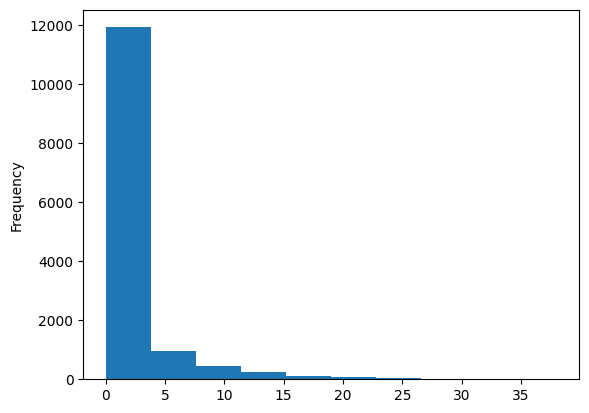

In [ ]:
snow.plot.hist()

<AxesSubplot: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

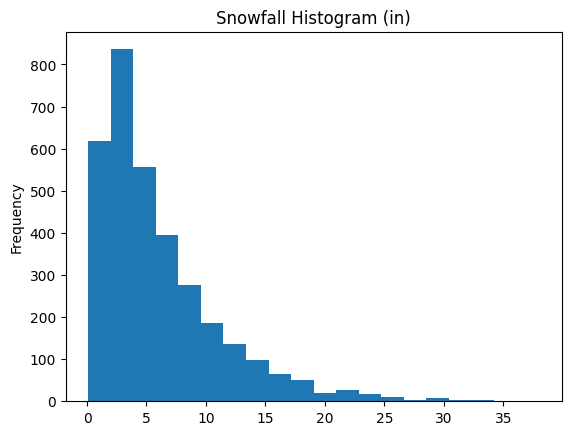

In [ ]:
# change bins
snow[snow>0].plot.hist(bins=20, title="Snowfall Histogram (in)")

## 14.4 Box Plot

<AxesSubplot: >

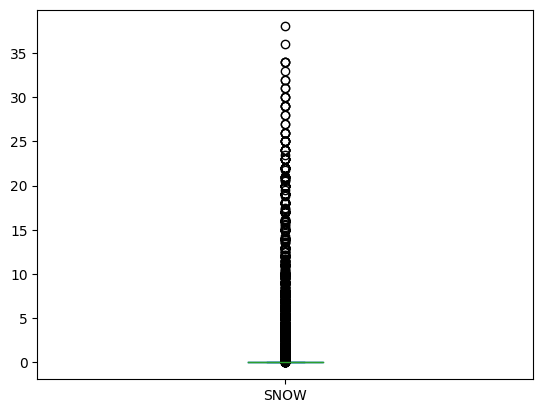

In [ ]:
snow.plot.box()

<AxesSubplot: >

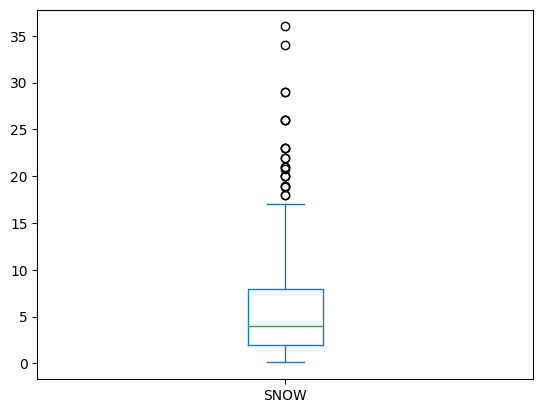

In [ ]:
# limit to snow amounts during January
(snow[lambda s:(s.index.month==1) & (s>0)]
.plot.box())

## 14.5 Kernel Density Estimation Plot

- A smoothed histogram

<AxesSubplot: ylabel='Density'>

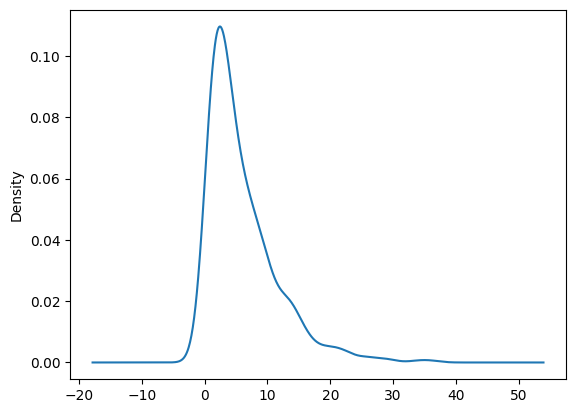

In [ ]:
(snow[lambda s:(s.index.month == 1) & (s>0)]
.plot.kde())

## 14.6 Line Plots

<Axes: >

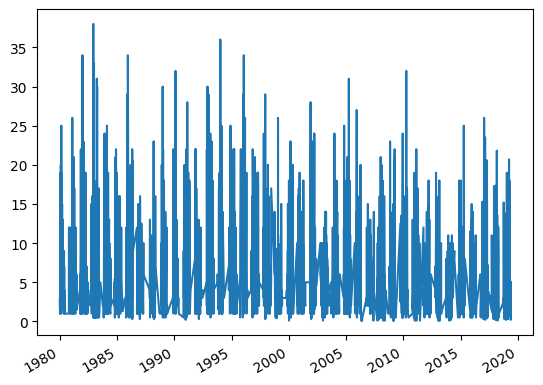

In [7]:
snow[snow>0].plot.line()

<ipython-input-12-8d2501268071>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


<Axes: >

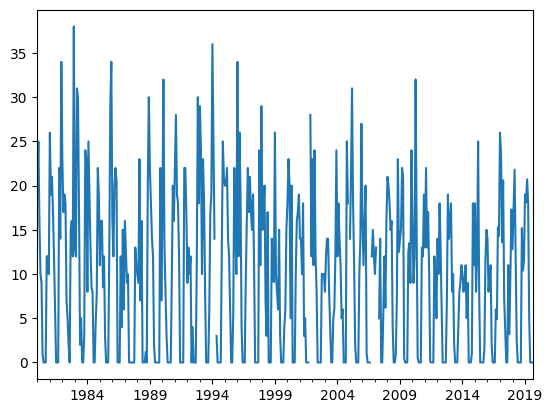

In [12]:
# aggregate at the monthly level
(snow
.resample('ME')
.max().plot.line())

<ipython-input-13-f6248c1b57c8>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


<Axes: >

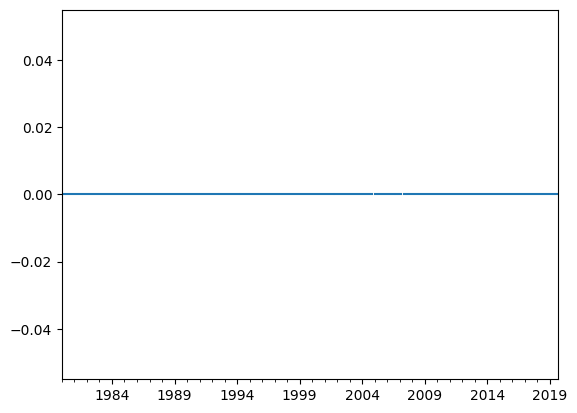

In [13]:
# aggregate at the monthly level
(snow
.resample('ME')
.min().plot.line())

<ipython-input-8-70917850a5c5>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


<Axes: >

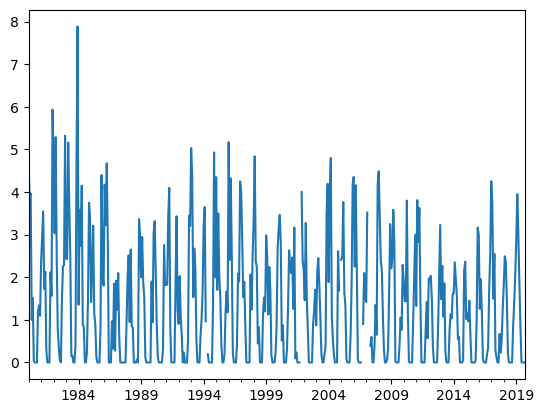

In [8]:
# aggregate at the monthly level
(snow
.resample('M')
.mean()
.plot.line())

## 14.7 Line Plots with Multiple Aggregations

<AxesSubplot: >

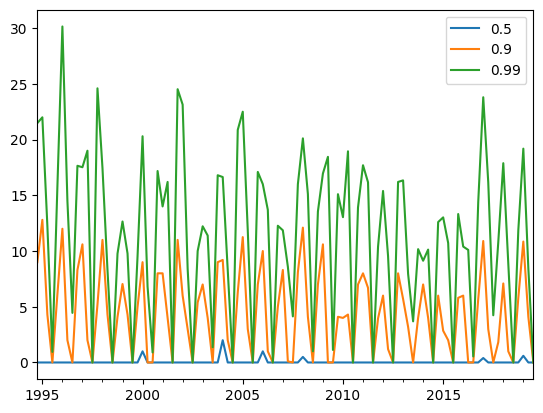

In [ ]:
(snow
.resample('Q')
.quantile([.5, .9, .99])
.unstack()
.iloc[-100:]
.plot.line())

## 14.8 Bar Plots

<AxesSubplot: title={'center': '2017 Monthly Percent of Snowfall'}>

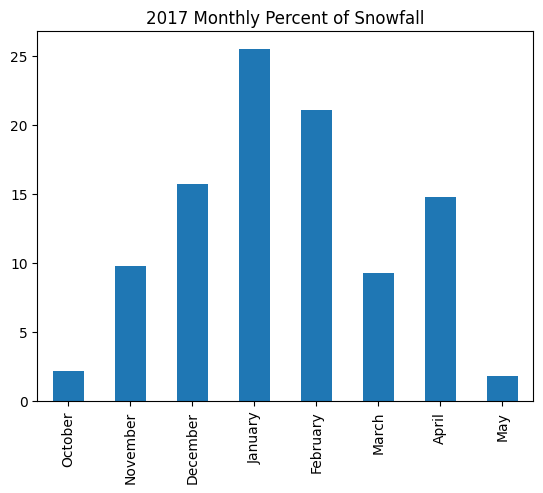

In [ ]:
season2017 = (snow.loc['2016-10': '2017-05'])
(season2017
.resample('M')
.sum()
.div(season2017.sum())
.mul(100)
.rename(lambda idx: idx.month_name())
.plot.bar(title="2017 Monthly Percent of Snowfall"))

<AxesSubplot: title={'center': '2017 Monthly Percent of Snowfall'}>

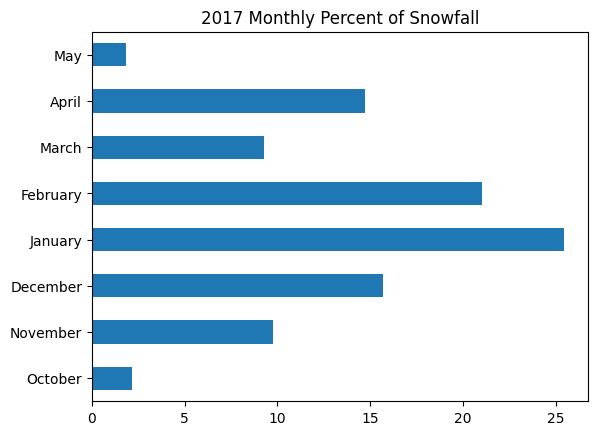

In [ ]:
season2017 = (snow.loc['2016-10': '2017-05'])
(season2017
.resample('M')
.sum()
.div(season2017.sum())
.mul(100)
.rename(lambda idx: idx.month_name())
.plot.barh(title="2017 Monthly Percent of Snowfall"))

- If more than 30 bars, not a good idea to use bar plot

<AxesSubplot: >

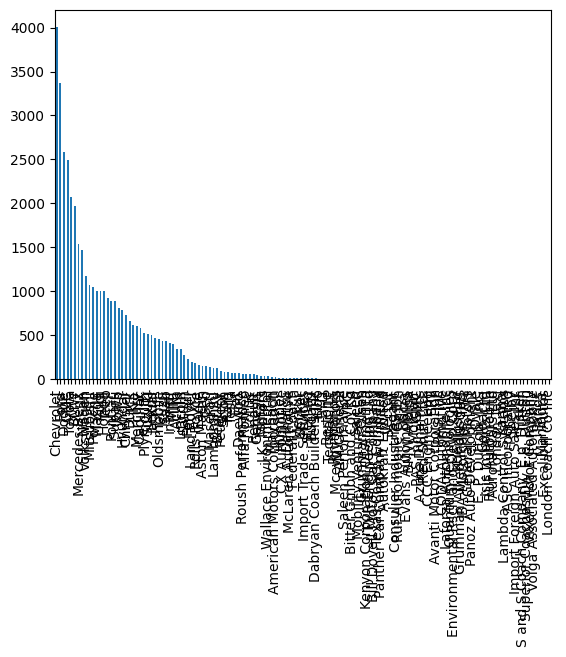

In [ ]:
make.value_counts().plot.bar()

<AxesSubplot: >

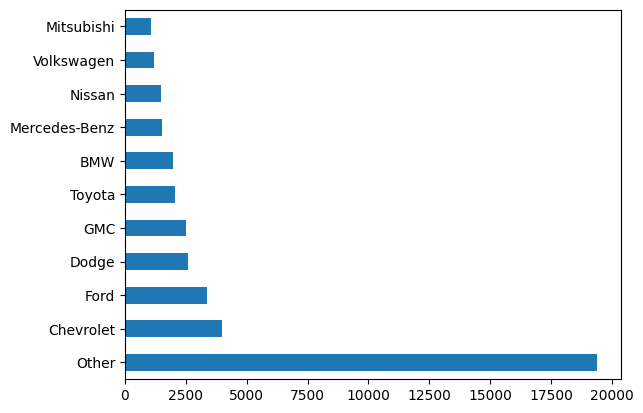

In [ ]:
# limit to 10
top10 = make.value_counts().index[:10]
(make
.where(make.isin(top10), 'Other')
.value_counts()
.plot.barh())

## 14.9 Pie Plots

<AxesSubplot: title={'center': '2017 Monthly Percent of Snowfall'}, ylabel='SNOW'>

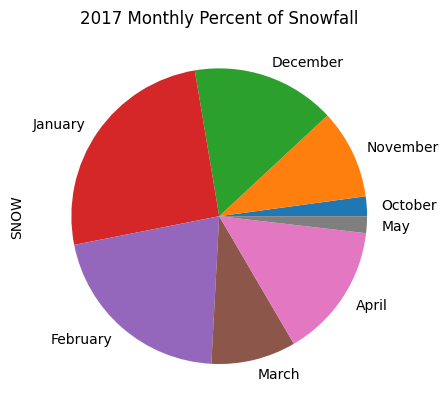

In [ ]:
(season2017
.resample('M')
.sum()
.div(season2017.sum())
.mul(100)
.rename(lambda idx: idx.month_name())
.plot.pie(title="2017 Monthly Percent of Snowfall"))

## 14.10 Styling

In [ ]:
import matplotlib
import seaborn as sns
color_palette = ['#440154', '#482677', '#404788', '#33638d', '#287d8e', '#1f968b', '#29af7f', '#55c667', '#73d055', '#b8de29', '#fde725']

In [ ]:
fp = matplotlib.font_manager.FontProperties(
    fname='/Fonts/roboto/Roboto-Condensed.ttf')